# Preparação dos dados

In [1]:
import os

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer

sns.set_theme()

## Importar dataset

In [2]:
data_path = '../data/' if os.path.exists('../data/') else 'https://raw.githubusercontent.com/kreativermario/Projeto-DECD/master/data/'

merged_path = data_path + 'treated/prepared/merged-dataset.csv'

merged_df = pd.read_csv(merged_path)

## Criar o conjunto totalmente categórico
- Visualizar os gráficos e ver a distribuição das variáveis.
- Ver quantos outliers existem por variável

In [3]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4914 entries, 0 to 4913
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   ano                                        4914 non-null   int64
 1   mês                                        4914 non-null   int64
 2   energia_ativa_baixa_tensao_kwh             4914 non-null   int64
 3   energia_ativa_alta_tensao_kwh              4914 non-null   int64
 4   cpes_domestico_baixa_tensao                4914 non-null   int64
 5   cpes_domestico_alta_tensao                 4914 non-null   int64
 6   cpes_iluminacao_publica_baixa_tensao       4914 non-null   int64
 7   cpes_nao_domestico_baixa_tensao            4914 non-null   int64
 8   cpes_nao_domestico_alta_tensao             4914 non-null   int64
 9   cpes_outros_baixa_tensao                   4914 non-null   int64
 10  cpes_outros_alta_tensao                    4914 

### Sabendo a estrutura de dados do dataset, existem algumas variáveis que são obviamente categóricas.
- São: nível_de_tensão, ano, mês
- Pode-se observar esse facto utilizando a função unique()

In [4]:
categorical_columns = ['ano', 'mês']
for column in categorical_columns:
    print(f"Valores únicos em {column}: {merged_df[column].unique()}")


Valores únicos em ano: [2022 2023 2024]
Valores únicos em mês: [ 8  9 10 11 12  1  2  3  4  5  6  7]


- Transformar em categórico

In [5]:
merged_df['ano'] = merged_df['ano'].astype('category')
merged_df['mês'] = merged_df['mês'].astype('category')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4914 entries, 0 to 4913
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   ano                                        4914 non-null   category
 1   mês                                        4914 non-null   category
 2   energia_ativa_baixa_tensao_kwh             4914 non-null   int64   
 3   energia_ativa_alta_tensao_kwh              4914 non-null   int64   
 4   cpes_domestico_baixa_tensao                4914 non-null   int64   
 5   cpes_domestico_alta_tensao                 4914 non-null   int64   
 6   cpes_iluminacao_publica_baixa_tensao       4914 non-null   int64   
 7   cpes_nao_domestico_baixa_tensao            4914 non-null   int64   
 8   cpes_nao_domestico_alta_tensao             4914 non-null   int64   
 9   cpes_outros_baixa_tensao                   4914 non-null   int64   
 10  cpes_outros_

### Discretizar a variável energia ativa baixa tensao kwh

O número de bins foi escolhido olhando para o histograma de distribuição dos valores da variável

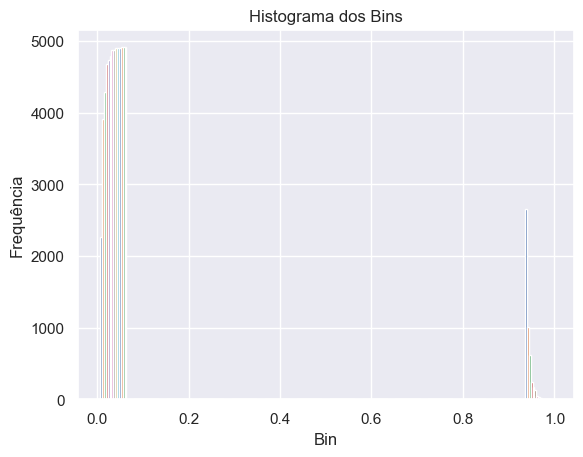

139066.00 - 2983911.75
2983911.75 - 6866211.91
6866211.91 - 12252934.51
12252934.51 - 18464831.15
18464831.15 - 25417395.44
25417395.44 - 34389550.85
34389550.85 - 47076139.34
47076139.34 - 62674180.04
62674180.04 - 97910537.38
97910537.38 - 128771723.03
128771723.03 - 138614964.27
138614964.27 - 152274526.67
152274526.67 - 161613366.00
161613366.00 - 163380671.00
Valores unicos energia_ativa_baixa_tensao_kwh: ['2983911.75 - 6866211.91', '6866211.91 - 12252934.51', '139066.00 - 2983911.75', '18464831.15 - 25417395.44', '12252934.51 - 18464831.15', ..., '128771723.03 - 138614964.27', '138614964.27 - 152274526.67', '161613366.00 - 163380671.00', '152274526.67 - 161613366.00', '62674180.04 - 97910537.38']
Length: 14
Categories (14, object): ['139066.00 - 2983911.75' < '2983911.75 - 6866211.91' < '6866211.91 - 12252934.51' < '12252934.51 - 18464831.15' ... '128771723.03 - 138614964.27' < '138614964.27 - 152274526.67' < '152274526.67 - 161613366.00' < '161613366.00 - 163380671.00']


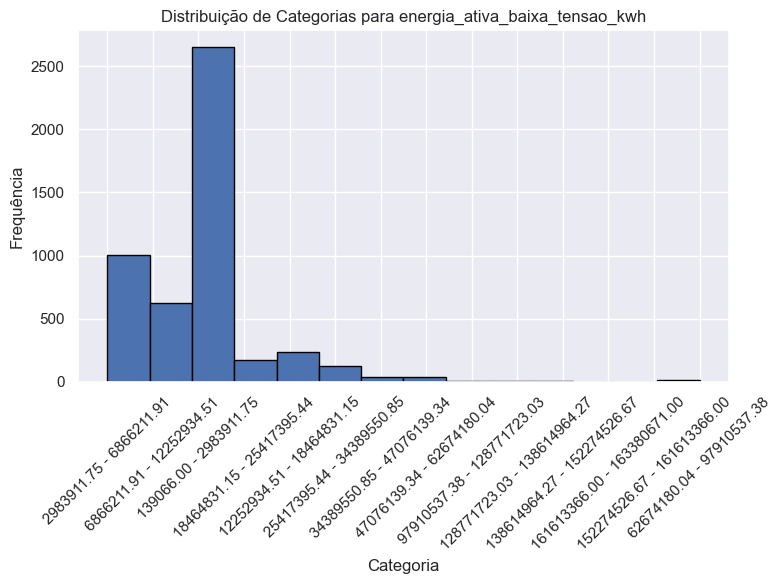

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4914 entries, 0 to 4913
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   ano                                        4914 non-null   category
 1   mês                                        4914 non-null   category
 2   energia_ativa_baixa_tensao_kwh             4914 non-null   category
 3   energia_ativa_alta_tensao_kwh              4914 non-null   int64   
 4   cpes_domestico_baixa_tensao                4914 non-null   int64   
 5   cpes_domestico_alta_tensao                 4914 non-null   int64   
 6   cpes_iluminacao_publica_baixa_tensao       4914 non-null   int64   
 7   cpes_nao_domestico_baixa_tensao            4914 non-null   int64   
 8   cpes_nao_domestico_alta_tensao             4914 non-null   int64   
 9   cpes_outros_baixa_tensao                   4914 non-null   int64   
 10  cpes_outros_

In [6]:
# Parametros
coluna_energia_ativa_baixa = "energia_ativa_baixa_tensao_kwh"
energia_ativa_baixa = merged_df[coluna_energia_ativa_baixa]
num_bins = 14


# Criar um binning
discretizer = KBinsDiscretizer(n_bins=num_bins, strategy="kmeans", subsample=None)

# Ajustar o discretizador aos dados e transformá-los em bins
bins = discretizer.fit_transform(energia_ativa_baixa.values.reshape(-1, 1))

bins_dense = bins.toarray()

# Histograma dos bins
plt.hist(bins_dense, bins=num_bins)
plt.xlabel('Bin')
plt.ylabel('Frequência')
plt.title('Histograma dos Bins')
plt.show()

# Obter os limites dos intervalos dos bins
bin_edges = discretizer.bin_edges_[0]

# Criar uma lista de categorias com base nos limites dos intervalos
categorias = [f'{bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}' for i in range(len(bin_edges)-1)]

# Imprimir as categorias
for categoria in categorias:
    print(categoria)

# Mapear os valores originais para os intervalos discretizados
merged_df[coluna_energia_ativa_baixa] = pd.cut(energia_ativa_baixa,
                                         bins=discretizer.bin_edges_[0],
                                         labels=categorias,
                                         include_lowest=True)

print(f"Valores unicos {coluna_energia_ativa_baixa}: {merged_df[coluna_energia_ativa_baixa].unique()}")

# Histograma da distribuição das categorias
plt.figure(figsize=(8, 6))
plt.hist(merged_df[coluna_energia_ativa_baixa], bins=num_bins, edgecolor='black')
plt.title(f'Distribuição de Categorias para {coluna_energia_ativa_baixa}')
plt.xlabel('Categoria')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

merged_df.info()

### Discretizar a variável energia ativa alta tensao kwh

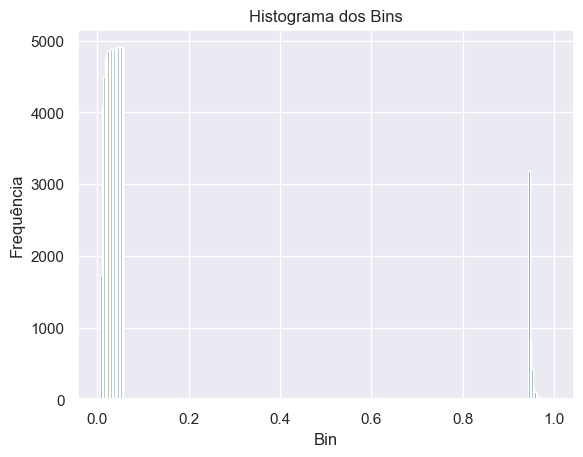

0.00 - 3353532.66
3353532.66 - 9317038.68
9317038.68 - 18336169.09
18336169.09 - 28225548.10
28225548.10 - 37597633.55
37597633.55 - 46732665.71
46732665.71 - 54151023.47
54151023.47 - 62644871.22
62644871.22 - 72220494.36
72220494.36 - 80429035.37
80429035.37 - 88237258.67
88237258.67 - 94821507.42
94821507.42 - 103652328.36
103652328.36 - 113154420.11
113154420.11 - 120239728.65
120239728.65 - 127947012.00
Valores unicos energia_ativa_alta_tensao_kwh: ['3353532.66 - 9317038.68', '0.00 - 3353532.66', '9317038.68 - 18336169.09', '18336169.09 - 28225548.10', '37597633.55 - 46732665.71', ..., '113154420.11 - 120239728.65', '103652328.36 - 113154420.11', '94821507.42 - 103652328.36', '80429035.37 - 88237258.67', '88237258.67 - 94821507.42']
Length: 16
Categories (16, object): ['0.00 - 3353532.66' < '3353532.66 - 9317038.68' < '9317038.68 - 18336169.09' < '18336169.09 - 28225548.10' ... '94821507.42 - 103652328.36' < '103652328.36 - 113154420.11' < '113154420.11 - 120239728.65' < '12023972

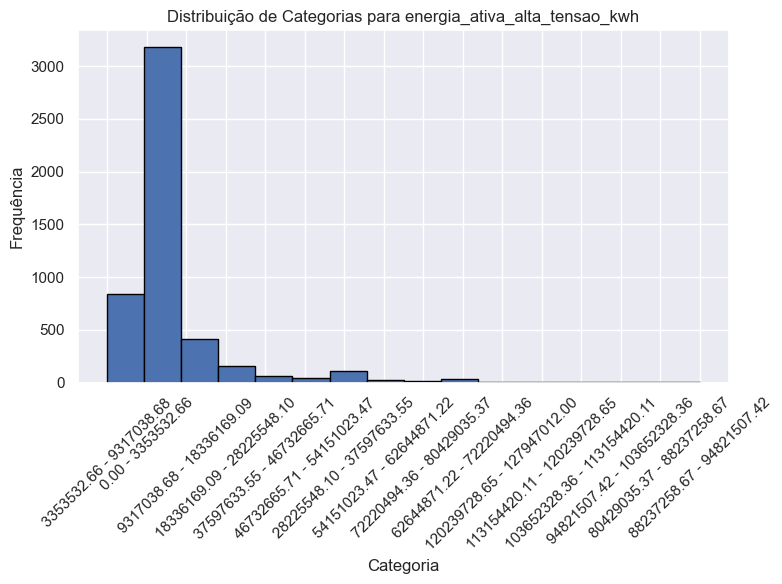

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4914 entries, 0 to 4913
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   ano                                        4914 non-null   category
 1   mês                                        4914 non-null   category
 2   energia_ativa_baixa_tensao_kwh             4914 non-null   category
 3   energia_ativa_alta_tensao_kwh              4914 non-null   category
 4   cpes_domestico_baixa_tensao                4914 non-null   int64   
 5   cpes_domestico_alta_tensao                 4914 non-null   int64   
 6   cpes_iluminacao_publica_baixa_tensao       4914 non-null   int64   
 7   cpes_nao_domestico_baixa_tensao            4914 non-null   int64   
 8   cpes_nao_domestico_alta_tensao             4914 non-null   int64   
 9   cpes_outros_baixa_tensao                   4914 non-null   int64   
 10  cpes_outros_

In [7]:
# Parametros
coluna_energia_ativa_alta = "energia_ativa_alta_tensao_kwh"
energia_ativa_alta = merged_df[coluna_energia_ativa_alta]
num_bins = 16


# Criar um binning
discretizer = KBinsDiscretizer(n_bins=num_bins, strategy="kmeans", subsample=None)

# Ajustar o discretizador aos dados e transformá-los em bins
bins = discretizer.fit_transform(energia_ativa_alta.values.reshape(-1, 1))

bins_dense = bins.toarray()

# Histograma dos bins
plt.hist(bins_dense, bins=num_bins)
plt.xlabel('Bin')
plt.ylabel('Frequência')
plt.title('Histograma dos Bins')
plt.show()

# Obter os limites dos intervalos dos bins
bin_edges = discretizer.bin_edges_[0]

# Criar uma lista de categorias com base nos limites dos intervalos
categorias = [f'{bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}' for i in range(len(bin_edges)-1)]

# Imprimir as categorias
for categoria in categorias:
    print(categoria)

# Mapear os valores originais para os intervalos discretizados
merged_df[coluna_energia_ativa_alta] = pd.cut(energia_ativa_alta,
                                         bins=discretizer.bin_edges_[0],
                                         labels=categorias,
                                         include_lowest=True)

print(f"Valores unicos {coluna_energia_ativa_alta}: {merged_df[coluna_energia_ativa_alta].unique()}")

# Histograma da distribuição das categorias
plt.figure(figsize=(8, 6))
plt.hist(merged_df[coluna_energia_ativa_alta], bins=num_bins, edgecolor='black')
plt.title(f'Distribuição de Categorias para {coluna_energia_ativa_alta}')
plt.xlabel('Categoria')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

merged_df.info()

### Discretizar CPEs domestico baixa tensao

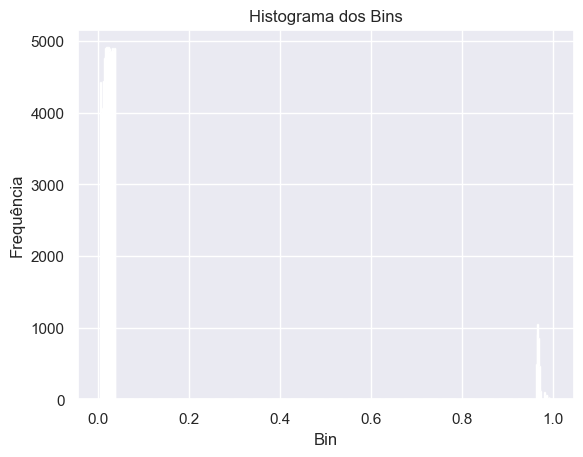

1042.00 - 3196.96
3196.96 - 5377.91
5377.91 - 8752.42
8752.42 - 14844.51
14844.51 - 22924.60
22924.60 - 32321.75
32321.75 - 40878.28
40878.28 - 47539.03
47539.03 - 51189.70
51189.70 - 51437.25
51437.25 - 51535.00
51535.00 - 51587.00
51587.00 - 55588.09
55588.09 - 63298.13
63298.13 - 71336.46
71336.46 - 77612.73
77612.73 - 83044.27
83044.27 - 91443.45
91443.45 - 101614.67
101614.67 - 122348.14
122348.14 - 155412.44
155412.44 - 240790.42
240790.42 - 309977.89
309977.89 - 312074.00
Valores unicos cpes_domestico_baixa_tensao: ['14844.51 - 22924.60', '3196.96 - 5377.91', '8752.42 - 14844.51', '40878.28 - 47539.03', '5377.91 - 8752.42', ..., '47539.03 - 51189.70', '51189.70 - 51437.25', '51437.25 - 51535.00', '51535.00 - 51587.00', '51587.00 - 55588.09']
Length: 24
Categories (24, object): ['1042.00 - 3196.96' < '3196.96 - 5377.91' < '5377.91 - 8752.42' < '8752.42 - 14844.51' ... '122348.14 - 155412.44' < '155412.44 - 240790.42' < '240790.42 - 309977.89' < '309977.89 - 312074.00']


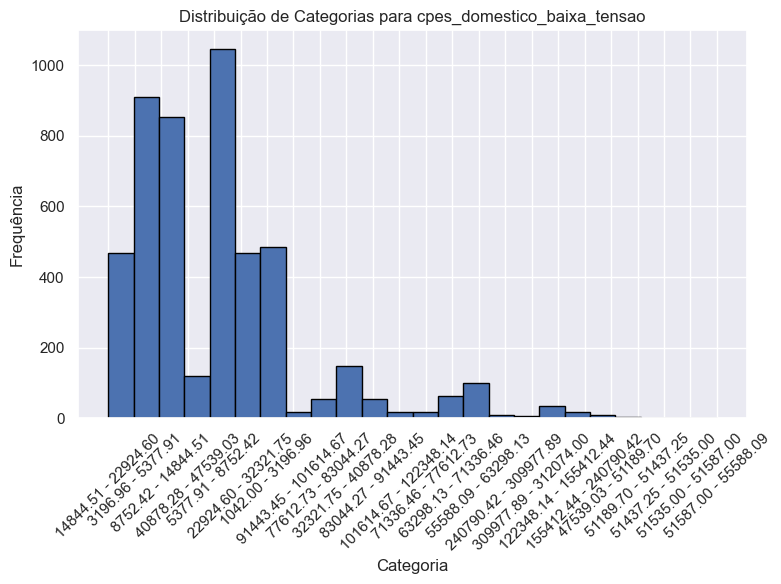

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4914 entries, 0 to 4913
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   ano                                        4914 non-null   category
 1   mês                                        4914 non-null   category
 2   energia_ativa_baixa_tensao_kwh             4914 non-null   category
 3   energia_ativa_alta_tensao_kwh              4914 non-null   category
 4   cpes_domestico_baixa_tensao                4914 non-null   category
 5   cpes_domestico_alta_tensao                 4914 non-null   int64   
 6   cpes_iluminacao_publica_baixa_tensao       4914 non-null   int64   
 7   cpes_nao_domestico_baixa_tensao            4914 non-null   int64   
 8   cpes_nao_domestico_alta_tensao             4914 non-null   int64   
 9   cpes_outros_baixa_tensao                   4914 non-null   int64   
 10  cpes_outros_

In [8]:
# Parametros
coluna_cpes_dom_baixa = "cpes_domestico_baixa_tensao"
cpes_domestico_baixa_tensao = merged_df[coluna_cpes_dom_baixa]
num_bins = 24


# Criar um binning
discretizer = KBinsDiscretizer(n_bins=num_bins, strategy="kmeans", subsample=None)

# Ajustar o discretizador aos dados e transformá-los em bins
bins = discretizer.fit_transform(cpes_domestico_baixa_tensao.values.reshape(-1, 1))

bins_dense = bins.toarray()

# Histograma dos bins
plt.hist(bins_dense, bins=num_bins) 
plt.xlabel('Bin')
plt.ylabel('Frequência')
plt.title('Histograma dos Bins')
plt.show()

# Obter os limites dos intervalos dos bins
bin_edges = discretizer.bin_edges_[0]

# Criar uma lista de categorias com base nos limites dos intervalos
categorias = [f'{bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}' for i in range(len(bin_edges)-1)]

# Imprimir as categorias
for categoria in categorias:
    print(categoria)

# Mapear os valores originais para os intervalos discretizados
merged_df[coluna_cpes_dom_baixa] = pd.cut(cpes_domestico_baixa_tensao,
                                         bins=discretizer.bin_edges_[0],
                                         labels=categorias,
                                         include_lowest=True)

print(f"Valores unicos {coluna_cpes_dom_baixa}: {merged_df[coluna_cpes_dom_baixa].unique()}")


# Histograma da distribuição das categorias
plt.figure(figsize=(8, 6))
plt.hist(merged_df[coluna_cpes_dom_baixa], bins=num_bins, edgecolor='black')
plt.title(f'Distribuição de Categorias para {coluna_cpes_dom_baixa}')
plt.xlabel('Categoria')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

merged_df.info()


### Discretizar CPEs domestico alta tensao

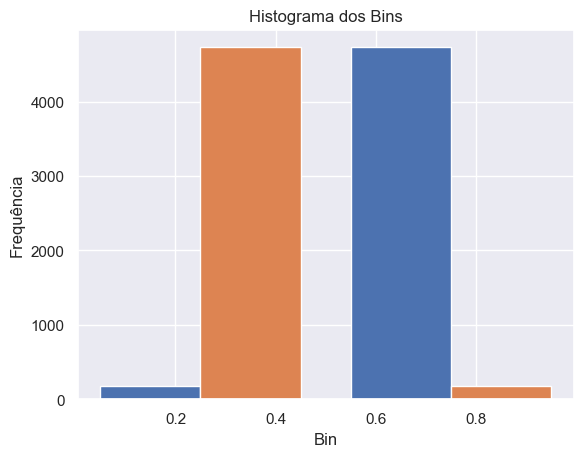

0.00 - 0.54
0.54 - 2.00
Valores unicos cpes_domestico_alta_tensao: ['0.00 - 0.54', '0.54 - 2.00']
Categories (2, object): ['0.00 - 0.54' < '0.54 - 2.00']


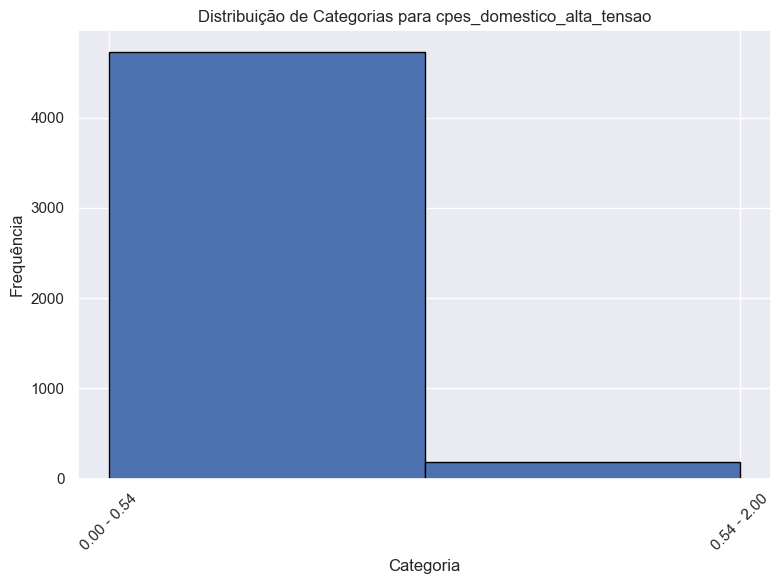

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4914 entries, 0 to 4913
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   ano                                        4914 non-null   category
 1   mês                                        4914 non-null   category
 2   energia_ativa_baixa_tensao_kwh             4914 non-null   category
 3   energia_ativa_alta_tensao_kwh              4914 non-null   category
 4   cpes_domestico_baixa_tensao                4914 non-null   category
 5   cpes_domestico_alta_tensao                 4914 non-null   category
 6   cpes_iluminacao_publica_baixa_tensao       4914 non-null   int64   
 7   cpes_nao_domestico_baixa_tensao            4914 non-null   int64   
 8   cpes_nao_domestico_alta_tensao             4914 non-null   int64   
 9   cpes_outros_baixa_tensao                   4914 non-null   int64   
 10  cpes_outros_

In [9]:
# Parametros
coluna_cpes_dom_alta = "cpes_domestico_alta_tensao"
cpes_domestico_alta_tensao = merged_df[coluna_cpes_dom_alta]
num_bins = 2


# Criar um binning
discretizer = KBinsDiscretizer(n_bins=num_bins, strategy="kmeans", subsample=None)

# Ajustar o discretizador aos dados e transformá-los em bins
bins = discretizer.fit_transform(cpes_domestico_alta_tensao.values.reshape(-1, 1))

bins_dense = bins.toarray()

# Histograma dos bins
plt.hist(bins_dense, bins=num_bins)
plt.xlabel('Bin')
plt.ylabel('Frequência')
plt.title('Histograma dos Bins')
plt.show()

# Obter os limites dos intervalos dos bins
bin_edges = discretizer.bin_edges_[0]

# Criar uma lista de categorias com base nos limites dos intervalos
categorias = [f'{bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}' for i in range(len(bin_edges)-1)]

# Imprimir as categorias
for categoria in categorias:
    print(categoria)

# Mapear os valores originais para os intervalos discretizados
merged_df[coluna_cpes_dom_alta] = pd.cut(cpes_domestico_alta_tensao,
                                         bins=discretizer.bin_edges_[0],
                                         labels=categorias,
                                         include_lowest=True)

print(f"Valores unicos {coluna_cpes_dom_alta}: {merged_df[coluna_cpes_dom_alta].unique()}")

# Histograma da distribuição das categorias
plt.figure(figsize=(8, 6))
plt.hist(merged_df[coluna_cpes_dom_alta], bins=num_bins, edgecolor='black')
plt.title(f'Distribuição de Categorias para {coluna_cpes_dom_alta}')
plt.xlabel('Categoria')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

merged_df.info()


### Discretizar CPEs Iluminação Publica Baixa Tensão

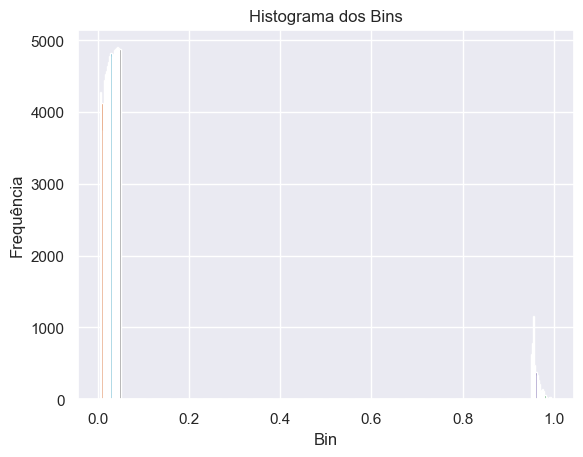

7.00 - 56.82
56.82 - 100.27
100.27 - 147.04
147.04 - 190.41
190.41 - 238.40
238.40 - 299.03
299.03 - 355.01
355.01 - 407.69
407.69 - 466.10
466.10 - 517.50
517.50 - 575.57
575.57 - 655.54
655.54 - 749.77
749.77 - 819.49
819.49 - 857.97
857.97 - 905.29
905.29 - 1055.94
1055.94 - 1185.00
Valores unicos cpes_iluminacao_publica_baixa_tensao: ['238.40 - 299.03', '56.82 - 100.27', '7.00 - 56.82', '147.04 - 190.41', '407.69 - 466.10', ..., '655.54 - 749.77', '905.29 - 1055.94', '1055.94 - 1185.00', '819.49 - 857.97', '857.97 - 905.29']
Length: 18
Categories (18, object): ['7.00 - 56.82' < '56.82 - 100.27' < '100.27 - 147.04' < '147.04 - 190.41' ... '819.49 - 857.97' < '857.97 - 905.29' < '905.29 - 1055.94' < '1055.94 - 1185.00']


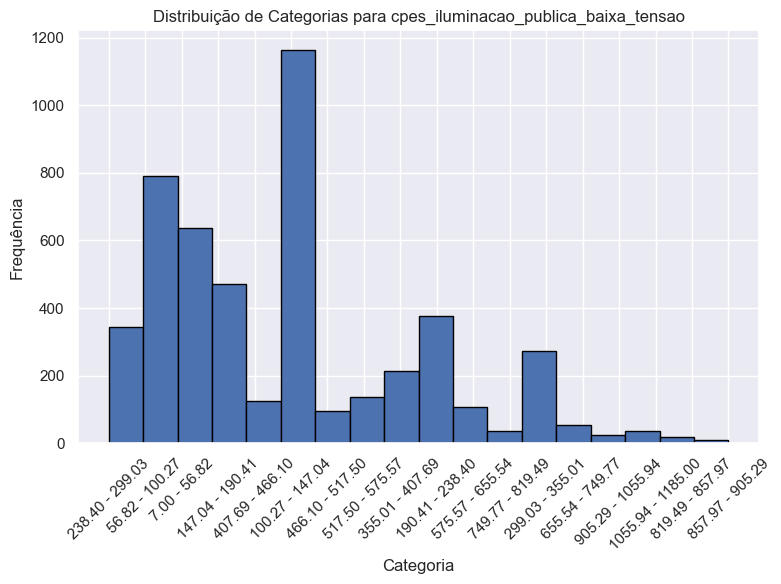

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4914 entries, 0 to 4913
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   ano                                        4914 non-null   category
 1   mês                                        4914 non-null   category
 2   energia_ativa_baixa_tensao_kwh             4914 non-null   category
 3   energia_ativa_alta_tensao_kwh              4914 non-null   category
 4   cpes_domestico_baixa_tensao                4914 non-null   category
 5   cpes_domestico_alta_tensao                 4914 non-null   category
 6   cpes_iluminacao_publica_baixa_tensao       4914 non-null   category
 7   cpes_nao_domestico_baixa_tensao            4914 non-null   int64   
 8   cpes_nao_domestico_alta_tensao             4914 non-null   int64   
 9   cpes_outros_baixa_tensao                   4914 non-null   int64   
 10  cpes_outros_

In [10]:
# Parametros
coluna_cpes_ilumpub_baixa = "cpes_iluminacao_publica_baixa_tensao"
cpes_iluminacao_publica_baixa_tensao = merged_df[coluna_cpes_ilumpub_baixa]
num_bins = 18


# Criar um binning
discretizer = KBinsDiscretizer(n_bins=num_bins, strategy="kmeans", subsample=None)

# Ajustar o discretizador aos dados e transformá-los em bins
bins = discretizer.fit_transform(cpes_iluminacao_publica_baixa_tensao.values.reshape(-1, 1))

bins_dense = bins.toarray()

# Histograma dos bins
plt.hist(bins_dense, bins=num_bins)
plt.xlabel('Bin')
plt.ylabel('Frequência')
plt.title('Histograma dos Bins')
plt.show()

# Obter os limites dos intervalos dos bins
bin_edges = discretizer.bin_edges_[0]

# Criar uma lista de categorias com base nos limites dos intervalos
categorias = [f'{bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}' for i in range(len(bin_edges)-1)]

# Imprimir as categorias
for categoria in categorias:
    print(categoria)

# Mapear os valores originais para os intervalos discretizados
merged_df[coluna_cpes_ilumpub_baixa] = pd.cut(cpes_iluminacao_publica_baixa_tensao,
                                         bins=discretizer.bin_edges_[0],
                                         labels=categorias,
                                         include_lowest=True)

print(f"Valores unicos {coluna_cpes_ilumpub_baixa}: {merged_df[coluna_cpes_ilumpub_baixa].unique()}")

# Histograma da distribuição das categorias
plt.figure(figsize=(8, 6))
plt.hist(merged_df[coluna_cpes_ilumpub_baixa], bins=num_bins, edgecolor='black')
plt.title(f'Distribuição de Categorias para {coluna_cpes_ilumpub_baixa}')
plt.xlabel('Categoria')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

merged_df.info()


### Discretizar CPEs Não Domestico Baixa Tensão

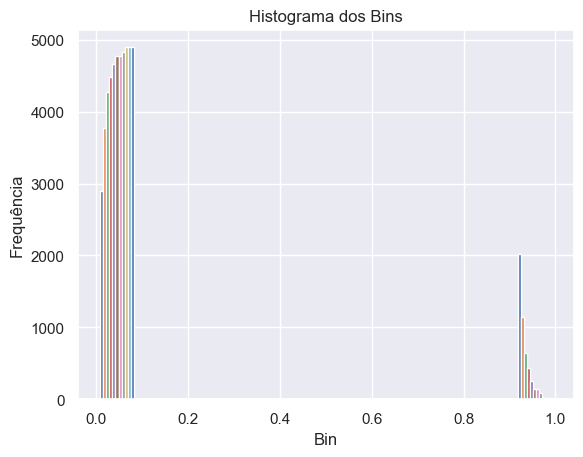

174.00 - 1556.31
1556.31 - 3135.72
3135.72 - 5235.35
5235.35 - 7947.00
7947.00 - 11173.19
11173.19 - 14557.61
14557.61 - 17978.37
17978.37 - 26901.08
26901.08 - 37272.25
37272.25 - 59994.39
59994.39 - 79984.00
Valores unicos cpes_nao_domestico_baixa_tensao: ['3135.72 - 5235.35', '174.00 - 1556.31', '1556.31 - 3135.72', '7947.00 - 11173.19', '5235.35 - 7947.00', ..., '14557.61 - 17978.37', '11173.19 - 14557.61', '59994.39 - 79984.00', '26901.08 - 37272.25', '37272.25 - 59994.39']
Length: 11
Categories (11, object): ['174.00 - 1556.31' < '1556.31 - 3135.72' < '3135.72 - 5235.35' < '5235.35 - 7947.00' ... '17978.37 - 26901.08' < '26901.08 - 37272.25' < '37272.25 - 59994.39' < '59994.39 - 79984.00']


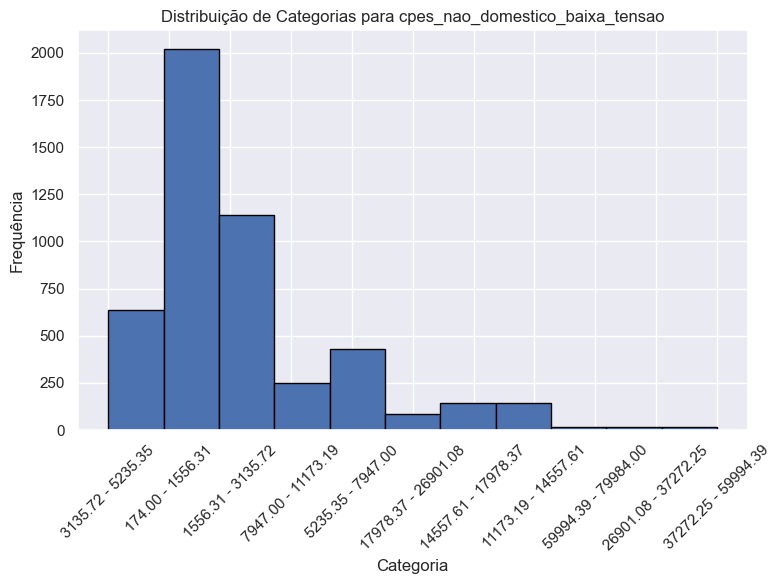

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4914 entries, 0 to 4913
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   ano                                        4914 non-null   category
 1   mês                                        4914 non-null   category
 2   energia_ativa_baixa_tensao_kwh             4914 non-null   category
 3   energia_ativa_alta_tensao_kwh              4914 non-null   category
 4   cpes_domestico_baixa_tensao                4914 non-null   category
 5   cpes_domestico_alta_tensao                 4914 non-null   category
 6   cpes_iluminacao_publica_baixa_tensao       4914 non-null   category
 7   cpes_nao_domestico_baixa_tensao            4914 non-null   category
 8   cpes_nao_domestico_alta_tensao             4914 non-null   int64   
 9   cpes_outros_baixa_tensao                   4914 non-null   int64   
 10  cpes_outros_

In [11]:
# Parametros
coluna_cpes_nao_dom_baixa = "cpes_nao_domestico_baixa_tensao"
cpes_nao_domestico_baixa_tensao = merged_df[coluna_cpes_nao_dom_baixa]
num_bins = 11


# Criar um binning
discretizer = KBinsDiscretizer(n_bins=num_bins, strategy="kmeans", subsample=None)

# Ajustar o discretizador aos dados e transformá-los em bins
bins = discretizer.fit_transform(cpes_nao_domestico_baixa_tensao.values.reshape(-1, 1))

bins_dense = bins.toarray()

# Histograma dos bins
plt.hist(bins_dense, bins=num_bins)
plt.xlabel('Bin')
plt.ylabel('Frequência')
plt.title('Histograma dos Bins')
plt.show()

# Obter os limites dos intervalos dos bins
bin_edges = discretizer.bin_edges_[0]

# Criar uma lista de categorias com base nos limites dos intervalos
categorias = [f'{bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}' for i in range(len(bin_edges)-1)]

# Imprimir as categorias
for categoria in categorias:
    print(categoria)

# Mapear os valores originais para os intervalos discretizados
merged_df[coluna_cpes_nao_dom_baixa] = pd.cut(cpes_nao_domestico_baixa_tensao,
                                         bins=discretizer.bin_edges_[0],
                                         labels=categorias,
                                         include_lowest=True)

print(f"Valores unicos {coluna_cpes_nao_dom_baixa}: {merged_df[coluna_cpes_nao_dom_baixa].unique()}")

# Histograma da distribuição das categorias
plt.figure(figsize=(8, 6))
plt.hist(merged_df[coluna_cpes_nao_dom_baixa], bins=num_bins, edgecolor='black')
plt.title(f'Distribuição de Categorias para {coluna_cpes_nao_dom_baixa}')
plt.xlabel('Categoria')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

merged_df.info()

### Discretizar CPEs Não Domestico Alta Tensão

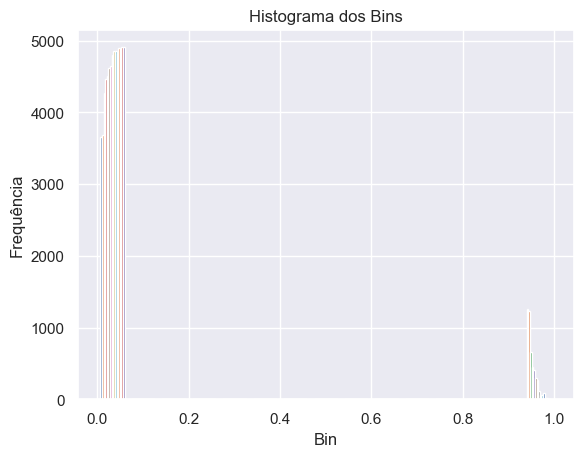

0.00 - 28.52
28.52 - 53.43
53.43 - 81.89
81.89 - 111.81
111.81 - 143.91
143.91 - 194.04
194.04 - 255.24
255.24 - 295.97
295.97 - 341.11
341.11 - 427.07
427.07 - 496.02
496.02 - 542.03
542.03 - 888.28
888.28 - 1212.07
1212.07 - 1226.00
Valores unicos cpes_nao_domestico_alta_tensao: ['111.81 - 143.91', '0.00 - 28.52', '28.52 - 53.43', '81.89 - 111.81', '295.97 - 341.11', ..., '542.03 - 888.28', '427.07 - 496.02', '888.28 - 1212.07', '1212.07 - 1226.00', '496.02 - 542.03']
Length: 15
Categories (15, object): ['0.00 - 28.52' < '28.52 - 53.43' < '53.43 - 81.89' < '81.89 - 111.81' ... '496.02 - 542.03' < '542.03 - 888.28' < '888.28 - 1212.07' < '1212.07 - 1226.00']


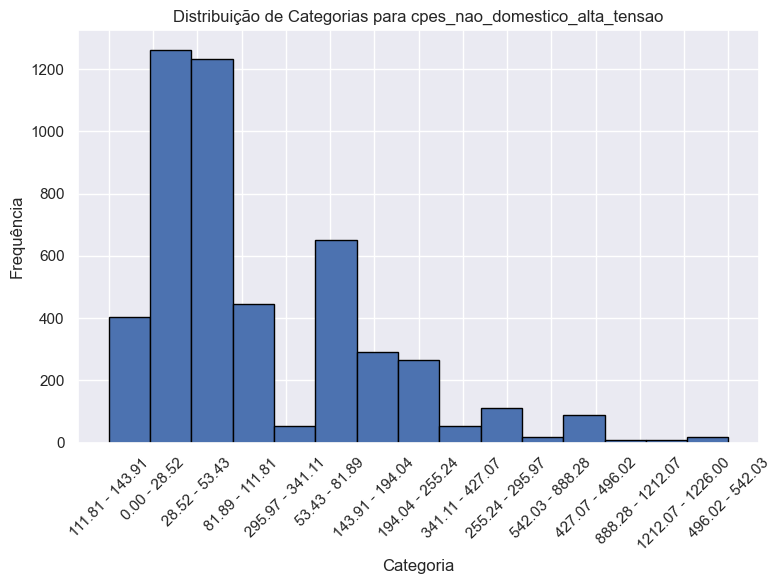

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4914 entries, 0 to 4913
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   ano                                        4914 non-null   category
 1   mês                                        4914 non-null   category
 2   energia_ativa_baixa_tensao_kwh             4914 non-null   category
 3   energia_ativa_alta_tensao_kwh              4914 non-null   category
 4   cpes_domestico_baixa_tensao                4914 non-null   category
 5   cpes_domestico_alta_tensao                 4914 non-null   category
 6   cpes_iluminacao_publica_baixa_tensao       4914 non-null   category
 7   cpes_nao_domestico_baixa_tensao            4914 non-null   category
 8   cpes_nao_domestico_alta_tensao             4914 non-null   category
 9   cpes_outros_baixa_tensao                   4914 non-null   int64   
 10  cpes_outros_

In [12]:
# Parametros
coluna_cpes_nao_dom_alta = "cpes_nao_domestico_alta_tensao"
cpes_nao_domestico_alta_tensao = merged_df[coluna_cpes_nao_dom_alta]
num_bins = 15


# Criar um binning
discretizer = KBinsDiscretizer(n_bins=num_bins, strategy="kmeans", subsample=None)

# Ajustar o discretizador aos dados e transformá-los em bins
bins = discretizer.fit_transform(cpes_nao_domestico_alta_tensao.values.reshape(-1, 1))

bins_dense = bins.toarray()

# Histograma dos bins
plt.hist(bins_dense, bins=num_bins)
plt.xlabel('Bin')
plt.ylabel('Frequência')
plt.title('Histograma dos Bins')
plt.show()

# Obter os limites dos intervalos dos bins
bin_edges = discretizer.bin_edges_[0]

# Criar uma lista de categorias com base nos limites dos intervalos
categorias = [f'{bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}' for i in range(len(bin_edges)-1)]

# Imprimir as categorias
for categoria in categorias:
    print(categoria)

# Mapear os valores originais para os intervalos discretizados
merged_df[coluna_cpes_nao_dom_alta] = pd.cut(cpes_nao_domestico_alta_tensao,
                                         bins=discretizer.bin_edges_[0],
                                         labels=categorias,
                                         include_lowest=True)

print(f"Valores unicos {coluna_cpes_nao_dom_alta}: {merged_df[coluna_cpes_nao_dom_alta].unique()}")

# Histograma da distribuição das categorias
plt.figure(figsize=(8, 6))
plt.hist(merged_df[coluna_cpes_nao_dom_alta], bins=num_bins, edgecolor='black')
plt.title(f'Distribuição de Categorias para {coluna_cpes_nao_dom_alta}')
plt.xlabel('Categoria')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

merged_df.info()

### Discretizar CPEs Outros Baixa Tensão

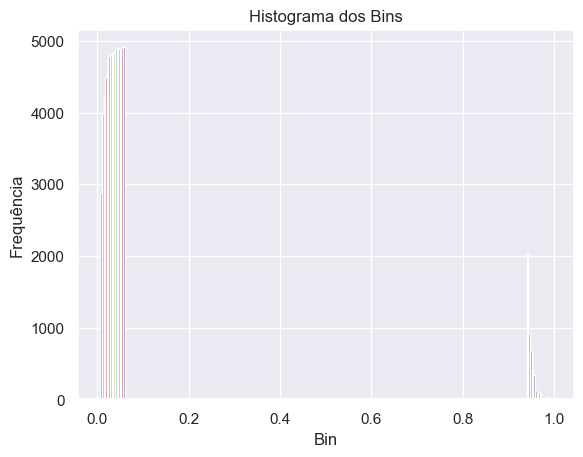

1.00 - 38.21
38.21 - 83.89
83.89 - 148.16
148.16 - 218.69
218.69 - 308.75
308.75 - 408.61
408.61 - 485.13
485.13 - 553.33
553.33 - 622.77
622.77 - 702.24
702.24 - 849.45
849.45 - 1004.09
1004.09 - 1579.20
1579.20 - 2139.40
2139.40 - 2186.00
Valores unicos cpes_outros_baixa_tensao: ['38.21 - 83.89', '83.89 - 148.16', '1.00 - 38.21', '218.69 - 308.75', '553.33 - 622.77', ..., '622.77 - 702.24', '2139.40 - 2186.00', '1579.20 - 2139.40', '1004.09 - 1579.20', '702.24 - 849.45']
Length: 15
Categories (15, object): ['1.00 - 38.21' < '38.21 - 83.89' < '83.89 - 148.16' < '148.16 - 218.69' ... '849.45 - 1004.09' < '1004.09 - 1579.20' < '1579.20 - 2139.40' < '2139.40 - 2186.00']


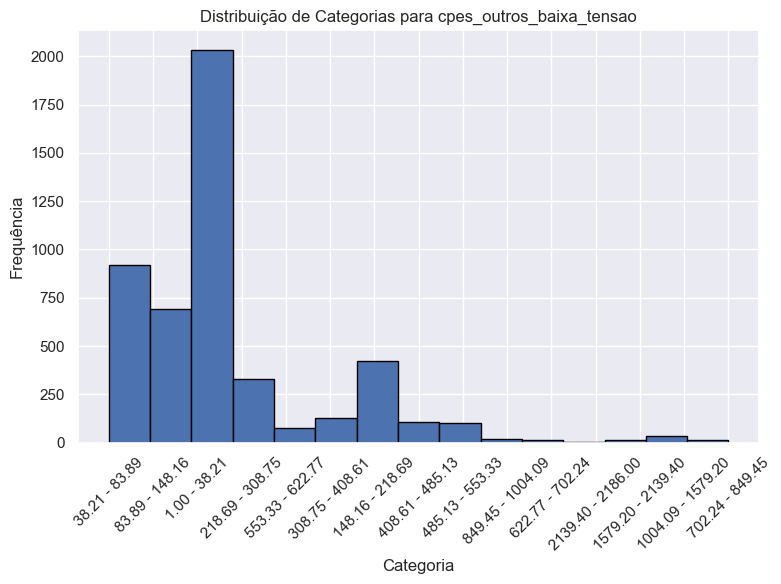

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4914 entries, 0 to 4913
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   ano                                        4914 non-null   category
 1   mês                                        4914 non-null   category
 2   energia_ativa_baixa_tensao_kwh             4914 non-null   category
 3   energia_ativa_alta_tensao_kwh              4914 non-null   category
 4   cpes_domestico_baixa_tensao                4914 non-null   category
 5   cpes_domestico_alta_tensao                 4914 non-null   category
 6   cpes_iluminacao_publica_baixa_tensao       4914 non-null   category
 7   cpes_nao_domestico_baixa_tensao            4914 non-null   category
 8   cpes_nao_domestico_alta_tensao             4914 non-null   category
 9   cpes_outros_baixa_tensao                   4914 non-null   category
 10  cpes_outros_

In [13]:
# Parametros
coluna_cpes_outros_baixa = "cpes_outros_baixa_tensao"
cpes_outros_baixa_tensao = merged_df[coluna_cpes_outros_baixa]
num_bins = 15


# Criar um binning
discretizer = KBinsDiscretizer(n_bins=num_bins, strategy="kmeans", subsample=None)

# Ajustar o discretizador aos dados e transformá-los em bins
bins = discretizer.fit_transform(cpes_outros_baixa_tensao.values.reshape(-1, 1))

bins_dense = bins.toarray()

# Histograma dos bins
plt.hist(bins_dense, bins=num_bins)
plt.xlabel('Bin')
plt.ylabel('Frequência')
plt.title('Histograma dos Bins')
plt.show()

# Obter os limites dos intervalos dos bins
bin_edges = discretizer.bin_edges_[0]

# Criar uma lista de categorias com base nos limites dos intervalos
categorias = [f'{bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}' for i in range(len(bin_edges)-1)]

# Imprimir as categorias
for categoria in categorias:
    print(categoria)

# Mapear os valores originais para os intervalos discretizados
merged_df[coluna_cpes_outros_baixa] = pd.cut(cpes_outros_baixa_tensao,
                                         bins=discretizer.bin_edges_[0],
                                         labels=categorias,
                                         include_lowest=True)

print(f"Valores unicos {coluna_cpes_outros_baixa}: {merged_df[coluna_cpes_outros_baixa].unique()}")

# Histograma da distribuição das categorias
plt.figure(figsize=(8, 6))
plt.hist(merged_df[coluna_cpes_outros_baixa], bins=num_bins, edgecolor='black')
plt.title(f'Distribuição de Categorias para {coluna_cpes_outros_baixa}')
plt.xlabel('Categoria')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

merged_df.info()

### Discretizar CPEs Outros Alta Tensão

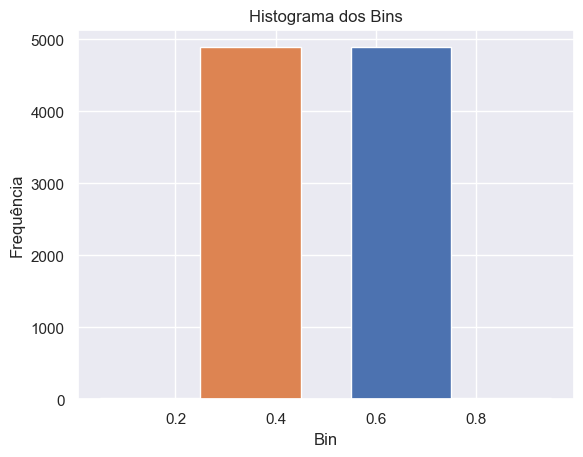

0.00 - 27.46
27.46 - 75.00
Valores unicos cpes_outros_alta_tensao: ['0.00 - 27.46', '27.46 - 75.00']
Categories (2, object): ['0.00 - 27.46' < '27.46 - 75.00']


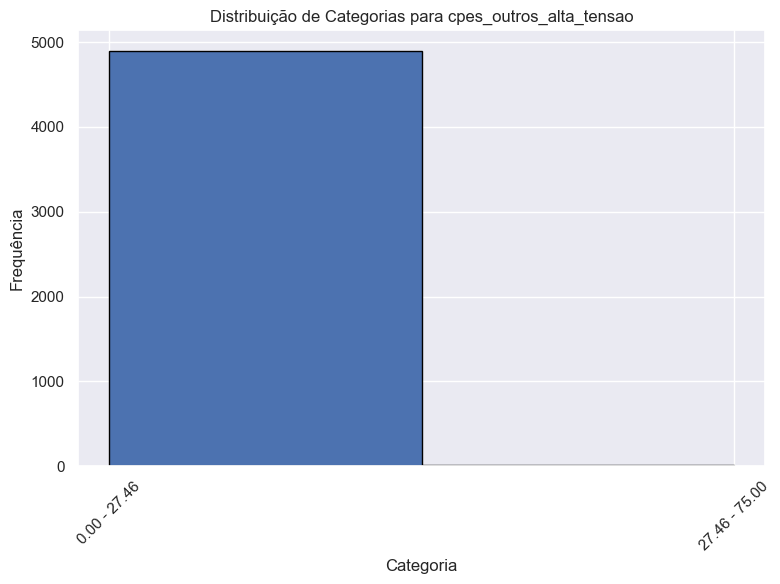

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4914 entries, 0 to 4913
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   ano                                        4914 non-null   category
 1   mês                                        4914 non-null   category
 2   energia_ativa_baixa_tensao_kwh             4914 non-null   category
 3   energia_ativa_alta_tensao_kwh              4914 non-null   category
 4   cpes_domestico_baixa_tensao                4914 non-null   category
 5   cpes_domestico_alta_tensao                 4914 non-null   category
 6   cpes_iluminacao_publica_baixa_tensao       4914 non-null   category
 7   cpes_nao_domestico_baixa_tensao            4914 non-null   category
 8   cpes_nao_domestico_alta_tensao             4914 non-null   category
 9   cpes_outros_baixa_tensao                   4914 non-null   category
 10  cpes_outros_

In [14]:
# Parametros
coluna_cpes_outros_alta = "cpes_outros_alta_tensao"
cpes_outros_alta_tensao = merged_df[coluna_cpes_outros_alta]
num_bins = 2


# Criar um binning
discretizer = KBinsDiscretizer(n_bins=num_bins, strategy="kmeans", subsample=None)

# Ajustar o discretizador aos dados e transformá-los em bins
bins = discretizer.fit_transform(cpes_outros_alta_tensao.values.reshape(-1, 1))

bins_dense = bins.toarray()

# Histograma dos bins
plt.hist(bins_dense, bins=num_bins)
plt.xlabel('Bin')
plt.ylabel('Frequência')
plt.title('Histograma dos Bins')
plt.show()

# Obter os limites dos intervalos dos bins
bin_edges = discretizer.bin_edges_[0]

# Criar uma lista de categorias com base nos limites dos intervalos
categorias = [f'{bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}' for i in range(len(bin_edges)-1)]

# Imprimir as categorias
for categoria in categorias:
    print(categoria)

# Mapear os valores originais para os intervalos discretizados
merged_df[coluna_cpes_outros_alta] = pd.cut(cpes_outros_alta_tensao,
                                         bins=discretizer.bin_edges_[0],
                                         labels=categorias,
                                         include_lowest=True)

print(f"Valores unicos {coluna_cpes_outros_alta}: {merged_df[coluna_cpes_outros_alta].unique()}")

# Histograma da distribuição das categorias
plt.figure(figsize=(8, 6))
plt.hist(merged_df[coluna_cpes_outros_alta], bins=num_bins, edgecolor='black')
plt.title(f'Distribuição de Categorias para {coluna_cpes_outros_alta}')
plt.xlabel('Categoria')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

merged_df.info()

### Discretizar CPEs Mobilidade Eletrica Não Baixa Tensão

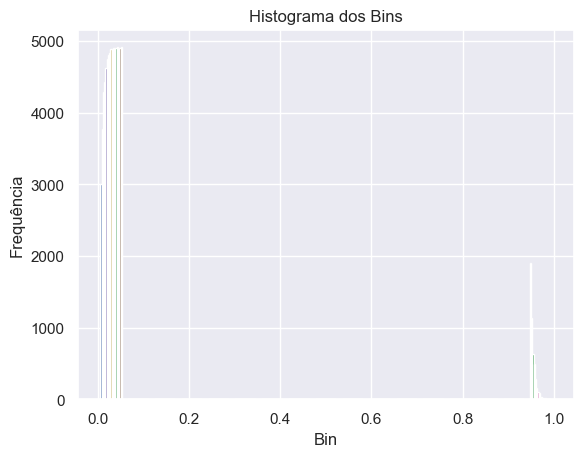

1144.00 - 8292.53
8292.53 - 16488.92
16488.92 - 29385.43
29385.43 - 46318.89
46318.89 - 66111.12
66111.12 - 91019.96
91019.96 - 117492.23
117492.23 - 145961.06
145961.06 - 175740.15
175740.15 - 208386.39
208386.39 - 248981.24
248981.24 - 275737.50
275737.50 - 367521.33
367521.33 - 466404.44
466404.44 - 488467.28
488467.28 - 510300.33
510300.33 - 528158.00
Valores unicos cpes_mobilidade_eletrica_nao_baixa_tensao: ['16488.92 - 29385.43', '29385.43 - 46318.89', '1144.00 - 8292.53', '8292.53 - 16488.92', '46318.89 - 66111.12', ..., '488467.28 - 510300.33', '510300.33 - 528158.00', '248981.24 - 275737.50', '275737.50 - 367521.33', '208386.39 - 248981.24']
Length: 17
Categories (17, object): ['1144.00 - 8292.53' < '8292.53 - 16488.92' < '16488.92 - 29385.43' < '29385.43 - 46318.89' ... '367521.33 - 466404.44' < '466404.44 - 488467.28' < '488467.28 - 510300.33' < '510300.33 - 528158.00']


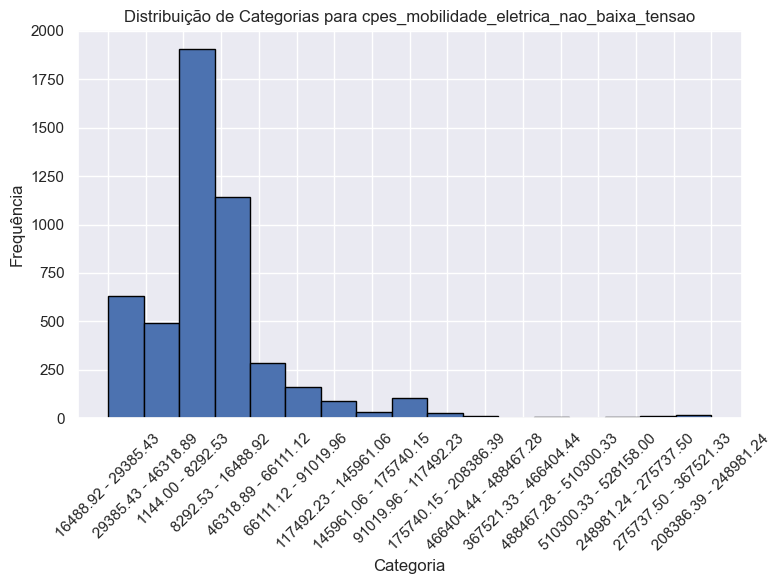

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4914 entries, 0 to 4913
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   ano                                        4914 non-null   category
 1   mês                                        4914 non-null   category
 2   energia_ativa_baixa_tensao_kwh             4914 non-null   category
 3   energia_ativa_alta_tensao_kwh              4914 non-null   category
 4   cpes_domestico_baixa_tensao                4914 non-null   category
 5   cpes_domestico_alta_tensao                 4914 non-null   category
 6   cpes_iluminacao_publica_baixa_tensao       4914 non-null   category
 7   cpes_nao_domestico_baixa_tensao            4914 non-null   category
 8   cpes_nao_domestico_alta_tensao             4914 non-null   category
 9   cpes_outros_baixa_tensao                   4914 non-null   category
 10  cpes_outros_

In [15]:
# Parametros
coluna_cpes_mob_elet_nao_baixa = "cpes_mobilidade_eletrica_nao_baixa_tensao"
cpes_mobilidade_eletrica_nao_baixa_tensao = merged_df[coluna_cpes_mob_elet_nao_baixa]
num_bins = 17


# Criar um binning
discretizer = KBinsDiscretizer(n_bins=num_bins, strategy="kmeans", subsample=None)

# Ajustar o discretizador aos dados e transformá-los em bins
bins = discretizer.fit_transform(cpes_mobilidade_eletrica_nao_baixa_tensao.values.reshape(-1, 1))

bins_dense = bins.toarray()

# Histograma dos bins
plt.hist(bins_dense, bins=num_bins)
plt.xlabel('Bin')
plt.ylabel('Frequência')
plt.title('Histograma dos Bins')
plt.show()

# Obter os limites dos intervalos dos bins
bin_edges = discretizer.bin_edges_[0]

# Criar uma lista de categorias com base nos limites dos intervalos
categorias = [f'{bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}' for i in range(len(bin_edges)-1)]

# Imprimir as categorias
for categoria in categorias:
    print(categoria)

# Mapear os valores originais para os intervalos discretizados
merged_df[coluna_cpes_mob_elet_nao_baixa] = pd.cut(cpes_mobilidade_eletrica_nao_baixa_tensao,
                                         bins=discretizer.bin_edges_[0],
                                         labels=categorias,
                                         include_lowest=True)

print(f"Valores unicos {coluna_cpes_mob_elet_nao_baixa}: {merged_df[coluna_cpes_mob_elet_nao_baixa].unique()}")

# Histograma da distribuição das categorias
plt.figure(figsize=(8, 6))
plt.hist(merged_df[coluna_cpes_mob_elet_nao_baixa], bins=num_bins, edgecolor='black')
plt.title(f'Distribuição de Categorias para {coluna_cpes_mob_elet_nao_baixa}')
plt.xlabel('Categoria')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

merged_df.info()

### Discretizar CPEs Mobilidade Eletrica Sim Baixa Tensão

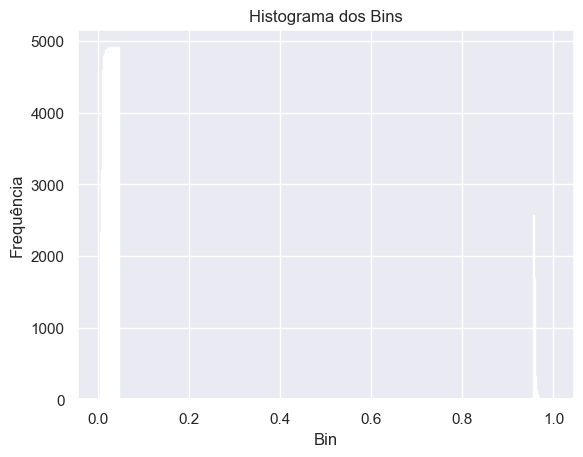

0.00 - 3.87
3.87 - 12.51
12.51 - 28.31
28.31 - 47.28
47.28 - 68.50
68.50 - 91.26
91.26 - 115.76
115.76 - 135.43
135.43 - 151.71
151.71 - 171.21
171.21 - 188.75
188.75 - 206.75
206.75 - 226.50
226.50 - 246.33
246.33 - 266.00
266.00 - 285.33
285.33 - 307.67
307.67 - 335.00
335.00 - 362.50
362.50 - 382.00
Valores unicos cpes_mobilidade_eletrica_sim_baixa_tensao: ['0.00 - 3.87', '3.87 - 12.51', '12.51 - 28.31', '28.31 - 47.28', '47.28 - 68.50', ..., '266.00 - 285.33', '285.33 - 307.67', '307.67 - 335.00', '335.00 - 362.50', '362.50 - 382.00']
Length: 20
Categories (20, object): ['0.00 - 3.87' < '3.87 - 12.51' < '12.51 - 28.31' < '28.31 - 47.28' ... '285.33 - 307.67' < '307.67 - 335.00' < '335.00 - 362.50' < '362.50 - 382.00']


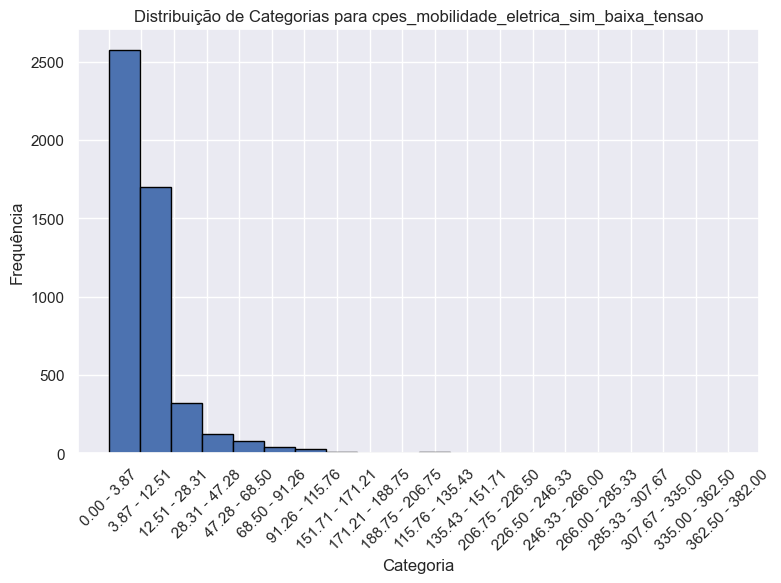

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4914 entries, 0 to 4913
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   ano                                        4914 non-null   category
 1   mês                                        4914 non-null   category
 2   energia_ativa_baixa_tensao_kwh             4914 non-null   category
 3   energia_ativa_alta_tensao_kwh              4914 non-null   category
 4   cpes_domestico_baixa_tensao                4914 non-null   category
 5   cpes_domestico_alta_tensao                 4914 non-null   category
 6   cpes_iluminacao_publica_baixa_tensao       4914 non-null   category
 7   cpes_nao_domestico_baixa_tensao            4914 non-null   category
 8   cpes_nao_domestico_alta_tensao             4914 non-null   category
 9   cpes_outros_baixa_tensao                   4914 non-null   category
 10  cpes_outros_

In [16]:
# Parametros
coluna_cpes_mob_elet_sim_baixa = "cpes_mobilidade_eletrica_sim_baixa_tensao"
cpes_mobilidade_eletrica_sim_baixa_tensao = merged_df[coluna_cpes_mob_elet_sim_baixa]
num_bins = 20


# Criar um binning
discretizer = KBinsDiscretizer(n_bins=num_bins, strategy="kmeans", subsample=None)

# Ajustar o discretizador aos dados e transformá-los em bins
bins = discretizer.fit_transform(cpes_mobilidade_eletrica_sim_baixa_tensao.values.reshape(-1, 1))

bins_dense = bins.toarray()

# Histograma dos bins
plt.hist(bins_dense, bins=num_bins)
plt.xlabel('Bin')
plt.ylabel('Frequência')
plt.title('Histograma dos Bins')
plt.show()

# Obter os limites dos intervalos dos bins
bin_edges = discretizer.bin_edges_[0]

# Criar uma lista de categorias com base nos limites dos intervalos
categorias = [f'{bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}' for i in range(len(bin_edges)-1)]

# Imprimir as categorias
for categoria in categorias:
    print(categoria)

# Mapear os valores originais para os intervalos discretizados
merged_df[coluna_cpes_mob_elet_sim_baixa] = pd.cut(cpes_mobilidade_eletrica_sim_baixa_tensao,
                                         bins=discretizer.bin_edges_[0],
                                         labels=categorias,
                                         include_lowest=True)

print(f"Valores unicos {coluna_cpes_mob_elet_sim_baixa}: {merged_df[coluna_cpes_mob_elet_sim_baixa].unique()}")

# Histograma da distribuição das categorias
plt.figure(figsize=(8, 6))
plt.hist(merged_df[coluna_cpes_mob_elet_sim_baixa], bins=num_bins, edgecolor='black')
plt.title(f'Distribuição de Categorias para {coluna_cpes_mob_elet_sim_baixa}')
plt.xlabel('Categoria')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

merged_df.info()

In [17]:
merged_df.info()
merged_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4914 entries, 0 to 4913
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   ano                                        4914 non-null   category
 1   mês                                        4914 non-null   category
 2   energia_ativa_baixa_tensao_kwh             4914 non-null   category
 3   energia_ativa_alta_tensao_kwh              4914 non-null   category
 4   cpes_domestico_baixa_tensao                4914 non-null   category
 5   cpes_domestico_alta_tensao                 4914 non-null   category
 6   cpes_iluminacao_publica_baixa_tensao       4914 non-null   category
 7   cpes_nao_domestico_baixa_tensao            4914 non-null   category
 8   cpes_nao_domestico_alta_tensao             4914 non-null   category
 9   cpes_outros_baixa_tensao                   4914 non-null   category
 10  cpes_outros_

,ano,mês,energia_ativa_baixa_tensao_kwh,energia_ativa_alta_tensao_kwh,cpes_domestico_baixa_tensao,cpes_domestico_alta_tensao,cpes_iluminacao_publica_baixa_tensao,cpes_nao_domestico_baixa_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_baixa_tensao,cpes_outros_alta_tensao,cpes_mobilidade_eletrica_nao_baixa_tensao,cpes_mobilidade_eletrica_sim_baixa_tensao
count,4914,4914,4914,4914,4914,4914,4914,4914,4914,4914,4914,4914,4914
unique,3,12,14,16,24,2,18,11,15,15,2,17,20
top,2023,1,139066.00 - 2983911.75,0.00 - 3353532.66,5377.91 - 8752.42,0.00 - 0.54,100.27 - 147.04,174.00 - 1556.31,0.00 - 28.52,1.00 - 38.21,0.00 - 27.46,1144.00 - 8292.53,0.00 - 3.87
freq,3276,546,2650,3179,1046,4730,1163,2018,1261,2032,4892,1907,2576


- Ver valores null e duplicados. Naturalmente há muitos duplicados porque foi feita a discretização das variáveis contínuas em ordinais categóricas.
- Não se deve droppar estas linhas porque são pertinentes para a análise

In [18]:
# Verificar valores vazios
nulls = merged_df.isnull().sum()
print('Número de nulls: ', nulls)

# Verificar duplicados
duplicates = merged_df.duplicated()
print("Número de linhas duplicadas:", duplicates.sum())

Número de nulls:  ano                                          0
mês                                          0
energia_ativa_baixa_tensao_kwh               0
energia_ativa_alta_tensao_kwh                0
cpes_domestico_baixa_tensao                  0
cpes_domestico_alta_tensao                   0
cpes_iluminacao_publica_baixa_tensao         0
cpes_nao_domestico_baixa_tensao              0
cpes_nao_domestico_alta_tensao               0
cpes_outros_baixa_tensao                     0
cpes_outros_alta_tensao                      0
cpes_mobilidade_eletrica_nao_baixa_tensao    0
cpes_mobilidade_eletrica_sim_baixa_tensao    0
dtype: int64
Número de linhas duplicadas: 1222


### Guardar o dataframe categorico

Guardar uma versão com o ano e mês

In [19]:
file_path = data_path + 'treated/prepared/categoric/dataset-categoric-both-tensions.csv'

merged_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/categoric/dataset-categoric-both-tensions.csv


### Separar os datasets em dois:
    - Um para baixa e outro para alta tensão

In [20]:
# Selecionar as variáveis de baixa tensão
baixa_tensao_columns = ['ano', 'mês', 'energia_ativa_baixa_tensao_kwh', 
                        'cpes_domestico_baixa_tensao', 'cpes_iluminacao_publica_baixa_tensao',
                        'cpes_nao_domestico_baixa_tensao', 'cpes_outros_baixa_tensao',
                        'cpes_mobilidade_eletrica_nao_baixa_tensao', 'cpes_mobilidade_eletrica_sim_baixa_tensao']

# Selecionar as variáveis de alta tensão
alta_tensao_columns = ['ano', 'mês', 'energia_ativa_alta_tensao_kwh',
                       'cpes_domestico_alta_tensao',
                       'cpes_nao_domestico_alta_tensao', 'cpes_outros_alta_tensao']

# Criar os datasets separados
baixa_tensao_df = merged_df[baixa_tensao_columns].copy()
alta_tensao_df = merged_df[alta_tensao_columns].copy()

#### Dataframe de baixa tensão

In [21]:
baixa_tensao_df.info()
baixa_tensao_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4914 entries, 0 to 4913
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   ano                                        4914 non-null   category
 1   mês                                        4914 non-null   category
 2   energia_ativa_baixa_tensao_kwh             4914 non-null   category
 3   cpes_domestico_baixa_tensao                4914 non-null   category
 4   cpes_iluminacao_publica_baixa_tensao       4914 non-null   category
 5   cpes_nao_domestico_baixa_tensao            4914 non-null   category
 6   cpes_outros_baixa_tensao                   4914 non-null   category
 7   cpes_mobilidade_eletrica_nao_baixa_tensao  4914 non-null   category
 8   cpes_mobilidade_eletrica_sim_baixa_tensao  4914 non-null   category
dtypes: category(9)
memory usage: 48.3 KB


,ano,mês,energia_ativa_baixa_tensao_kwh,cpes_domestico_baixa_tensao,cpes_iluminacao_publica_baixa_tensao,cpes_nao_domestico_baixa_tensao,cpes_outros_baixa_tensao,cpes_mobilidade_eletrica_nao_baixa_tensao,cpes_mobilidade_eletrica_sim_baixa_tensao
count,4914,4914,4914,4914,4914,4914,4914,4914,4914
unique,3,12,14,24,18,11,15,17,20
top,2023,1,139066.00 - 2983911.75,5377.91 - 8752.42,100.27 - 147.04,174.00 - 1556.31,1.00 - 38.21,1144.00 - 8292.53,0.00 - 3.87
freq,3276,546,2650,1046,1163,2018,2032,1907,2576


In [22]:
# Verificar valores vazios
nulls = baixa_tensao_df.isnull().sum()
print('Número de nulls: ', nulls)

# Verificar duplicados
duplicates = baixa_tensao_df.duplicated()
print("Número de linhas duplicadas:", duplicates.sum())

Número de nulls:  ano                                          0
mês                                          0
energia_ativa_baixa_tensao_kwh               0
cpes_domestico_baixa_tensao                  0
cpes_iluminacao_publica_baixa_tensao         0
cpes_nao_domestico_baixa_tensao              0
cpes_outros_baixa_tensao                     0
cpes_mobilidade_eletrica_nao_baixa_tensao    0
cpes_mobilidade_eletrica_sim_baixa_tensao    0
dtype: int64
Número de linhas duplicadas: 1858


#### Guardar dataset de baixa tensão

In [23]:
file_path = data_path + 'treated/prepared/categoric/dataset-categoric-low-tension.csv'

baixa_tensao_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/categoric/dataset-categoric-low-tension.csv


#### Dataframe de alta tensão

In [24]:
alta_tensao_df.info()
alta_tensao_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4914 entries, 0 to 4913
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   ano                             4914 non-null   category
 1   mês                             4914 non-null   category
 2   energia_ativa_alta_tensao_kwh   4914 non-null   category
 3   cpes_domestico_alta_tensao      4914 non-null   category
 4   cpes_nao_domestico_alta_tensao  4914 non-null   category
 5   cpes_outros_alta_tensao         4914 non-null   category
dtypes: category(6)
memory usage: 31.0 KB


,ano,mês,energia_ativa_alta_tensao_kwh,cpes_domestico_alta_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_alta_tensao
count,4914,4914,4914,4914,4914,4914
unique,3,12,16,2,15,2
top,2023,1,0.00 - 3353532.66,0.00 - 0.54,0.00 - 28.52,0.00 - 27.46
freq,3276,546,3179,4730,1261,4892


#### Guardar dataset de alta tensão

In [25]:
file_path = data_path + 'treated/prepared/categoric/dataset-categoric-high-tension.csv'

alta_tensao_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/categoric/dataset-categoric-high-tension.csv


### Criar dois subsets dentro de cada dataset de nivel de tensao

#### Criar o subset de teste (Dados de 2024)

In [26]:
baixa_tensao_df['ano'] = baixa_tensao_df['ano'].astype(int)
# Filtrar o DataFrame para obter os valores de 2024
baixa_tensao_2024_df = baixa_tensao_df[(baixa_tensao_df['ano'] == 2024)].copy()

baixa_tensao_2024_df.info()
baixa_tensao_2024_df.describe()

alta_tensao_df['ano'] = alta_tensao_df['ano'].astype(int)
# Filtrar o DataFrame para obter os valores de 2024
alta_tensao_2024_df = alta_tensao_df[(alta_tensao_df['ano'] == 2024)].copy()

alta_tensao_2024_df.info()
alta_tensao_2024_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 273 entries, 17 to 4913
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   ano                                        273 non-null    int64   
 1   mês                                        273 non-null    category
 2   energia_ativa_baixa_tensao_kwh             273 non-null    category
 3   cpes_domestico_baixa_tensao                273 non-null    category
 4   cpes_iluminacao_publica_baixa_tensao       273 non-null    category
 5   cpes_nao_domestico_baixa_tensao            273 non-null    category
 6   cpes_outros_baixa_tensao                   273 non-null    category
 7   cpes_mobilidade_eletrica_nao_baixa_tensao  273 non-null    category
 8   cpes_mobilidade_eletrica_sim_baixa_tensao  273 non-null    category
dtypes: category(8), int64(1)
memory usage: 11.3 KB
<class 'pandas.core.frame.DataFrame'>
Index:

,ano
count,273.0
mean,2024.0
std,0.0
min,2024.0
25%,2024.0
50%,2024.0
75%,2024.0
max,2024.0


Ver nulls e duplicados

In [27]:
# Verificar valores vazios
nulls = baixa_tensao_2024_df.isnull().sum()
print('Número de nulls: ', nulls)

# Verificar duplicados
duplicates = baixa_tensao_2024_df.duplicated()
print("Número de linhas duplicadas:", duplicates.sum())

Número de nulls:  ano                                          0
mês                                          0
energia_ativa_baixa_tensao_kwh               0
cpes_domestico_baixa_tensao                  0
cpes_iluminacao_publica_baixa_tensao         0
cpes_nao_domestico_baixa_tensao              0
cpes_outros_baixa_tensao                     0
cpes_mobilidade_eletrica_nao_baixa_tensao    0
cpes_mobilidade_eletrica_sim_baixa_tensao    0
dtype: int64
Número de linhas duplicadas: 108


In [28]:
# Verificar valores vazios
nulls = alta_tensao_2024_df.isnull().sum()
print('Número de nulls: ', nulls)

# Verificar duplicados
duplicates = alta_tensao_2024_df.duplicated()
print("Número de linhas duplicadas:", duplicates.sum())

Número de nulls:  ano                               0
mês                               0
energia_ativa_alta_tensao_kwh     0
cpes_domestico_alta_tensao        0
cpes_nao_domestico_alta_tensao    0
cpes_outros_alta_tensao           0
dtype: int64
Número de linhas duplicadas: 245


##### Guardar subset de teste (2024)

In [29]:
file_path = data_path + 'treated/prepared/categoric/test/dataset-categoric-low-tension-2024.csv'

baixa_tensao_2024_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/categoric/test/dataset-categoric-low-tension-2024.csv


In [30]:
file_path = data_path + 'treated/prepared/categoric/test/dataset-categoric-high-tension-2024.csv'

alta_tensao_2024_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/categoric/test/dataset-categoric-high-tension-2024.csv


#### Criar o subset de treino (Dados 2022, 2023)

In [31]:
# Filtrar o DataFrame para obter os valores que não são de 2024
baixa_tensao_outros_df = baixa_tensao_df[(baixa_tensao_df['ano'] != 2024)].copy()

baixa_tensao_outros_df.info()
baixa_tensao_outros_df.describe()

# Filtrar o DataFrame para obter os valores que não são de 2024
alta_tensao_outros_df = alta_tensao_df[(alta_tensao_df['ano'] != 2024)].copy()

alta_tensao_outros_df.info()
alta_tensao_outros_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 4641 entries, 0 to 4912
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   ano                                        4641 non-null   int64   
 1   mês                                        4641 non-null   category
 2   energia_ativa_baixa_tensao_kwh             4641 non-null   category
 3   cpes_domestico_baixa_tensao                4641 non-null   category
 4   cpes_iluminacao_publica_baixa_tensao       4641 non-null   category
 5   cpes_nao_domestico_baixa_tensao            4641 non-null   category
 6   cpes_outros_baixa_tensao                   4641 non-null   category
 7   cpes_mobilidade_eletrica_nao_baixa_tensao  4641 non-null   category
 8   cpes_mobilidade_eletrica_sim_baixa_tensao  4641 non-null   category
dtypes: category(8), int64(1)
memory usage: 113.6 KB
<class 'pandas.core.frame.DataFrame'>
Index

,ano
count,4641.000000
mean,2022.705882
std,0.455694
min,2022.000000
25%,2022.000000
50%,2023.000000
75%,2023.000000
max,2023.000000


Ver nulls e duplicados

In [32]:
# Verificar valores vazios
nulls = baixa_tensao_outros_df.isnull().sum()
print('Número de nulls: ', nulls)

# Verificar duplicados
duplicates = baixa_tensao_outros_df.duplicated()
print("Número de linhas duplicadas:", duplicates.sum())

Número de nulls:  ano                                          0
mês                                          0
energia_ativa_baixa_tensao_kwh               0
cpes_domestico_baixa_tensao                  0
cpes_iluminacao_publica_baixa_tensao         0
cpes_nao_domestico_baixa_tensao              0
cpes_outros_baixa_tensao                     0
cpes_mobilidade_eletrica_nao_baixa_tensao    0
cpes_mobilidade_eletrica_sim_baixa_tensao    0
dtype: int64
Número de linhas duplicadas: 1750


In [33]:
# Verificar valores vazios
nulls = alta_tensao_outros_df.isnull().sum()
print('Número de nulls: ', nulls)

# Verificar duplicados
duplicates = alta_tensao_outros_df.duplicated()
print("Número de linhas duplicadas:", duplicates.sum())

Número de nulls:  ano                               0
mês                               0
energia_ativa_alta_tensao_kwh     0
cpes_domestico_alta_tensao        0
cpes_nao_domestico_alta_tensao    0
cpes_outros_alta_tensao           0
dtype: int64
Número de linhas duplicadas: 3830


##### Guardar subset de treino (2022 e 2023)

In [34]:
file_path = data_path + 'treated/prepared/categoric/train/dataset-categoric-low-tension-2022-2023.csv'

baixa_tensao_outros_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/categoric/train/dataset-categoric-low-tension-2022-2023.csv


In [35]:
file_path = data_path + 'treated/prepared/categoric/train/dataset-categoric-high-tension-2022-2023.csv'

alta_tensao_outros_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/categoric/train/dataset-categoric-high-tension-2022-2023.csv


### Guardar versões dos datasets sem a coluna ano e mês pois estas não têm boa correlação e por isso não têm interesse na análise

In [36]:
merged_df.drop(columns=['ano', 'mês'], inplace=True)

file_path = data_path + 'treated/prepared/categoric/no-dates/dataset-categoric-both-tensions-no-dates.csv'

merged_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/categoric/no-dates/dataset-categoric-both-tensions-no-dates.csv


In [37]:
baixa_tensao_df.drop(columns=['ano', 'mês'], inplace=True)

file_path = data_path + 'treated/prepared/categoric/no-dates/dataset-categoric-low-tensions-no-dates.csv'

baixa_tensao_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/categoric/no-dates/dataset-categoric-low-tensions-no-dates.csv


In [38]:
baixa_tensao_2024_df.drop(columns=['ano', 'mês'], inplace=True)

file_path = data_path + 'treated/prepared/categoric/no-dates/dataset-categoric-low-tensions-test-no-dates.csv'

baixa_tensao_2024_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/categoric/no-dates/dataset-categoric-low-tensions-test-no-dates.csv


In [39]:
baixa_tensao_outros_df.drop(columns=['ano', 'mês'], inplace=True)

file_path = data_path + 'treated/prepared/categoric/no-dates/dataset-categoric-low-tensions-train-no-dates.csv'

baixa_tensao_outros_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/categoric/no-dates/dataset-categoric-low-tensions-train-no-dates.csv


In [40]:
alta_tensao_df.drop(columns=['ano', 'mês'], inplace=True)

file_path = data_path + 'treated/prepared/categoric/no-dates/dataset-categoric-high-tensions-no-dates.csv'

alta_tensao_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/categoric/no-dates/dataset-categoric-high-tensions-no-dates.csv


In [41]:
alta_tensao_2024_df.drop(columns=['ano', 'mês'], inplace=True)

file_path = data_path + 'treated/prepared/categoric/no-dates/dataset-categoric-high-tensions-test-no-dates.csv'

alta_tensao_2024_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/categoric/no-dates/dataset-categoric-high-tensions-test-no-dates.csv


In [42]:
alta_tensao_outros_df.drop(columns=['ano', 'mês'], inplace=True)

file_path = data_path + 'treated/prepared/categoric/no-dates/dataset-categoric-high-tensions-train-no-dates.csv'

alta_tensao_outros_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/categoric/no-dates/dataset-categoric-high-tensions-train-no-dates.csv
